In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### 2. Подготовьте датасет к обучению моделей
- a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы


- b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

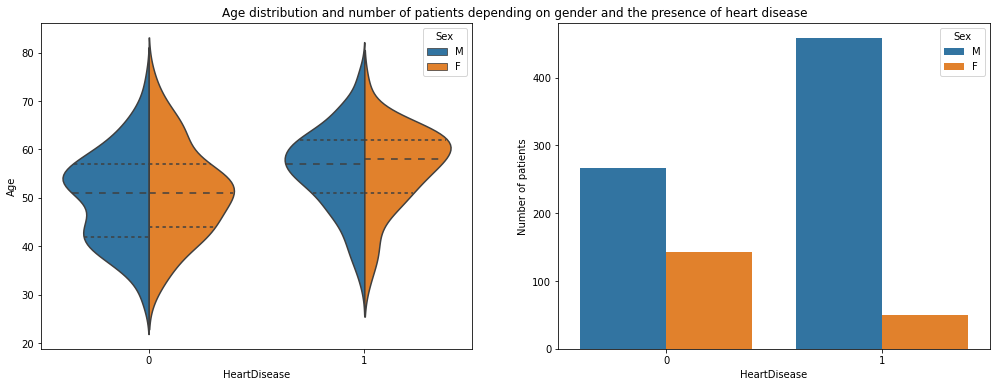

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(17,6))
plt.title('Age distribution and number of patients depending on gender and the presence of heart disease', x=-0.1)

sns.violinplot(x=df.HeartDisease, y=df.Age, hue=df.Sex, split=True, inner="quart", ax=axs[0])

df_count = df.groupby(['Sex', 'HeartDisease']).Age.count().reset_index()
sns.barplot(x=df_count.HeartDisease, y=df_count.Age, hue=df_count.Sex, hue_order=['M', 'F'])
plt.ylabel('Number of patients')

plt.show()

На левом графике изображено распределение возрастов в зависимости от пола и наличия сердечных заболеваний. Отчетливо видно, что средний возраст людей, имеющих сердечные заболевания выше, чем у людей со здоровым сердцем. Также по форме видно, что распределение у здоровых людей несколько более равномерное и охватывает больший диапазон возрастов. У женщин, имеющих сердечные заболевания средний возраст немного выше, чем у мужчин с заболеваниями. Здравый смысл подсказывает, что такие наблюдения в выборке вполне закономерны. Риск наличия проблем со здоровьем сердца действительно увеличивается с возрастом.

Что касается смещения среднего возраста женщин с болезнями сердца относительно мужчин, то тут стоит обратиться к графику справа, где представлено количество наблюдаемых пациентов в зависимости от пола и наличия сердечных заболеваний. Заметно существенное преобладание мужчин в датасете, причем если мужчин здоровых примерно в 2 раза больше, чем здоровых женщин, то мужчин с заболеваниями почти кратно больше, чем таковых женщин. Навряд ли это отражает реальную картину соотношения между полами. Такой дисбаланс необходимо учитывать при интерпретации исследований на основе датасета. Делать однозначные выводы о различии тех, или иных показателей в зависимости от пола нужно крайне осторожно.

In [4]:
from sklearn.preprocessing import StandardScaler

to_scale = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

scaler = StandardScaler()
scaler.fit(df[to_scale])
df[to_scale] = scaler.transform(df[to_scale])

In [5]:
cats = df.select_dtypes('object').columns
df = pd.get_dummies(df, columns=cats)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,0,1.382928,-0.832432,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,-0.478484,1.491752,-0.171961,0,0.754157,0.105664,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.129513,0.770188,0,-1.525138,-0.832432,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,-0.584556,0.302825,0.139040,0,-1.132156,0.574711,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,0.051881,0.951331,-0.034755,0,-0.581981,-0.832432,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


### 3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:
- a) tree.DecisionTreeClassifier


- b) ensemble.RandomForestClassifier

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report

In [8]:
from sklearn.metrics import classification_report

print(dt, '\n', classification_report(y_test, dt.predict(X_test)))
print(rf, '\n', classification_report(y_test, rf.predict(X_test)))

DecisionTreeClassifier(random_state=42) 
               precision    recall  f1-score   support

           0       0.73      0.83      0.78        77
           1       0.86      0.78      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.81      0.80      0.80       184

RandomForestClassifier(random_state=42) 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86        77
           1       0.90      0.89      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



### 6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию

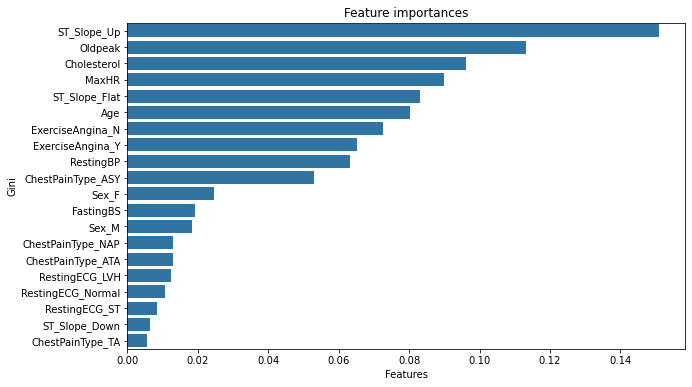

In [9]:
plt.figure(figsize=(10,6))
plt.title('Feature importances')

imp = pd.Series(index=X.columns, data=rf.feature_importances_).sort_values(ascending=False)
sns.barplot(x=imp, y=imp.index, color=sns.color_palette()[0])

plt.xlabel('Features')
plt.ylabel('Gini')
plt.show()

### 7. Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier
- a) Повторите п. 5

In [10]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, max_samples=0.5, max_features=0.5, random_state=42)
bagging.fit(X_train, y_train)

print(bagging, '\n', classification_report(y_test, bagging.predict(X_test)))

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.5,
                  max_samples=0.5, n_estimators=100, random_state=42) 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



### 8. Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier
- a) Повторите п. 5

In [11]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeClassifierCV

stacking = StackingClassifier([('dt', DecisionTreeClassifier(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('svc', LinearSVC(max_iter=2000, random_state=42))], RidgeClassifierCV())
stacking.fit(X_train, y_train)

print(stacking, '\n', classification_report(y_test, stacking.predict(X_test)))

StackingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('svc',
                                LinearSVC(max_iter=2000, random_state=42))],
                   final_estimator=RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ]))) 
               precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



### 9. Сформулируйте выводы по проделанной работе
- a) Сравните метрики построенных моделей

Одно дерево решений без подбора гиперпараметров на рассмотренном датасете сразу продемонстрировало весьма неплохую точность классификации. F1-мера с макроусреднением получилась `0.80`. Случайный лес по умолчанию из 100 деревьев заметно улучшил эту метрику, доведя ее до `0.88`, и в целом по всем проявлениям показал более высокое качество работы.

Бэггинг из 100 деревьев приблизился по своим показателям к случайному лесу, его F1-мера с макроусреднением получилась `0.86`. Это вполне естественно, ведь случайный лес по своей сути это и есть бэггинг из деревьев решений. Я предполагаю, что при тщательном подборе параметров можно самостоятельно настроить бэггинг-модель так, чтобы она работала не хуже случайного леса "из коробки".

Стекинг из 3 моделей (дерево решений, случайный лес, опорные вектора) выдал второй по качеству результат после случайного леса `0.87`. Несмотря на то, что в состав этого стека уже входит случайный лес, в совокупности он показывает чуть худшее качество. Связано ли это с гиперпараметрами, или с тем, что остальным моделям по факту нечем дополнить уже достаточно сильный лес, либо это случайность? Чтобы ответить на эти вопросы нужно проделать дополнительные эксперименты на разных датасетах.

- b) Напишите свое мнение, какая модель наилучшая и почему

На мой взгляд для задачи классификации этого датасета случайный лес подойдет лучше остальных рассмотренных моделей. Ансамбль из деревьев решений по определению будет лучше справляться с задачей, чем всего одно дерево, что и было видно исходя из прироста F1-меры. Как альтернативу случайному лесу "из коробки" можно настроить бэггинг из деревьев решений самостоятельно, но такая модель будет несколько сложнее в реализации, и не факт, что принесет прирост качества. Применять в этой задаче стекинг из нескольких моделей я считаю избыточным. Такой ансамбль получится более сложным, менее стабильным и на подбор его параметров уйдет гораздо больше времени. При этом неизвестно удастся ли превзойти в качестве случайный лес, если уделить его настройке досаточно времени.